In [18]:
##############################################################################################
############BIOM/SYSC 5405, Pattern Classificaiton and Experimental Design####################
############################## Project 5405## ################################################
################################### TUHEEN AHMMED, Nov 29, 2021 @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

import pandas as pd
import csv
import seaborn as sea
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# max rows and columns##
pd.set_option('display.max_rows', None)

# import libraries for charting and manipulations with datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

#confusion matrix#
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import ConfusionMatrixDisplay

#######ROC########
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold

#####P-R curve ####

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import PrecisionRecallDisplay


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot

########## plotpy #######
import plotly_express as px
import plotly.graph_objects as go

In [19]:
###### (a)data visualization########## 
##load data, read a csv file, last two labels KIBA and label
## if kiba > 12.1 label = TRUE 
## if kiba < 12.1 label = FALSE

drug = pd.read_csv("train_data_original.csv")

In [20]:
from sklearn.ensemble import IsolationForest

#iso = IsolationForest(contamination=0.1)
#yhat = iso.fit_predict(X_train)
#yhat.shape

In [21]:
##### 109479 rows and 338 columns
##### actual class last two columns; Kiba nad label 
##### datatypes, all are float64, KIBA=float64, Label=bool

drug.shape
drug.head()
drug.tail()

#data inspection after csv file importing 
drug.dtypes
drug.head()

,G26,G26_Target Sequence_in_SMILES_perc,G26_SMILES_in_Target Sequence_perc,G26_ARRO,G26_SMILES_base,G26_SMILES_base_perc,G26_Target Sequence_base,G26_Target Sequence_base_perc,G26_fdp_SMILES_base,G26_fdp_Target Sequence_base,...,G10_Target Sequence_base,G10_Target Sequence_base_perc,G10_fdp_SMILES_base,G10_fdp_Target Sequence_base,G10_fd_SMILES_base,G10_fd_Target Sequence_base,G10_std_SMILES_dist,G10_std_Target Sequence_dist,KIBA,Label
0,5.073946,0.954991,0.062554,16.739510,5.522422,0.105597,5.062549,0.098782,-0.849394,0.036227,...,5.645625,0.120050,-0.024235,-0.640176,-0.004603,-0.058854,0.538344,-0.688681,11.900001,False
1,6.826617,0.001154,0.014306,60569.338400,5.590014,0.091748,6.158633,0.126360,0.090594,0.112054,...,5.589494,0.122443,-0.261973,-0.644310,-0.019836,-0.060652,0.032666,-0.720316,11.699999,False
2,5.177106,0.818811,0.930755,1.312142,5.556566,0.128679,5.564309,0.099924,-0.690133,-0.830831,...,5.549520,0.117385,-0.346797,-0.768549,-0.024956,-0.071758,-0.112331,-1.020784,11.300000,False
3,5.179001,0.183497,0.970300,5.616494,5.258327,0.130410,5.683928,0.086053,-0.053087,-0.884247,...,5.784208,0.118799,0.045586,-0.755603,0.018378,-0.067145,1.285098,-0.965758,11.800001,False
4,5.822746,0.029429,0.326915,103.942684,5.621003,0.101558,5.896788,0.281712,0.072129,-0.045202,...,5.631512,0.120159,-0.181766,-0.524913,-0.015458,-0.051385,0.119600,-0.458659,11.600000,False


In [22]:
######################################################
###################removing outliers##################
####################removing outliers#################

from sklearn.svm import OneClassSVM

X= drug.drop(columns= ['KIBA' , 'Label'])
y= drug['Label']

print(X.shape, y.shape)

# identify outliers in the training dataset
ee = OneClassSVM(nu=0.05)
yhat = ee.fit_predict(X)
# select all rows that are not outliers
mask = yhat != -1
X, y = X.iloc[mask, :], y.iloc[mask]
# summarize the shape of the updated training dataset
print(X.shape, y.shape)




(109479, 336) (109479,)
(104006, 336) (104006,)


In [23]:
#############################################################################################################
####################### Stratified Train-Test Splits for classification, 80/20 (train/test split)############
#############################################################################################################

from sklearn.model_selection import train_test_split

#X= drug.drop(columns= ['KIBA' , 'Label'])
#y= drug['Label']

#print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify = y)
# summarize first 5 rows
#print(X_train)
# split again, and we should see the same split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify = y)
# summarize first 5 rows
#print(X_train)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(83204, 336) (83204,) (20802, 336) (20802,)


In [24]:
columns = drug.columns.array
columns

<PandasArray>
[                               'G26', 'G26_Target Sequence_in_SMILES_perc',
 'G26_SMILES_in_Target Sequence_perc',                           'G26_ARRO',
                    'G26_SMILES_base',               'G26_SMILES_base_perc',
           'G26_Target Sequence_base',      'G26_Target Sequence_base_perc',
                'G26_fdp_SMILES_base',       'G26_fdp_Target Sequence_base',
 ...
           'G10_Target Sequence_base',      'G10_Target Sequence_base_perc',
                'G10_fdp_SMILES_base',       'G10_fdp_Target Sequence_base',
                 'G10_fd_SMILES_base',        'G10_fd_Target Sequence_base',
                'G10_std_SMILES_dist',       'G10_std_Target Sequence_dist',
                               'KIBA',                              'Label']
Length: 338, dtype: object

In [25]:
X_train.shape

(83204, 336)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(83204, 336)
(20802, 336)
(83204,)
(20802,)


In [27]:
#X_train, X_test, y_train, y_test 
####### train-test split -- 80/20 #######
#ratio = 3.72
# 86324/23155 =3.72
# 69059/18524 =3.72
#17265/4631 = 3.72

print('Dataset: Class0(False)=%d, Class1(True)=%d' % (len(y[y==0]), len(y[y==1])))
print('Train: Class0(False)=%d, Class1(True)=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Test: Class0(False)=%d, Class1(True)=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Dataset: Class0(False)=82965, Class1(True)=21041
Train: Class0(False)=66371, Class1(True)=16833
Test: Class0(False)=16594, Class1(True)=4208


In [28]:
##########################################################
##############  Linear Discriminant Analysis #############
##########################################################
# evaluate a lda model on the dataset
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


model_336 = LinearDiscriminantAnalysis(n_components= None)
model_336.fit(X_train, y_train)
X_train = model_336.fit_transform(X_train, y_train)
X_test = model_336.transform(X_test)


scores_final = cross_val_score(model_336, X_train, y_train, scoring='accuracy')
# summarize result
print('Accuracy_train with std: %.3f (%.3f)' % (mean(scores_final), std(scores_final)))


scores_final_test = cross_val_score(model_336, X_test, y_test, scoring='accuracy')
# summarize result
print('Accuracy_test with std: %.3f (%.3f)' % (mean(scores_final_test), std(scores_final_test)))

Accuracy_train with std: 0.815 (0.001)
Accuracy_test with std: 0.812 (0.003)


accuracy for each fold with 336 featurs:: [0.81425395 0.81413377 0.81353284 0.81515534 0.81580529]
0.814576 accuracy with a standard deviation of 0.000804


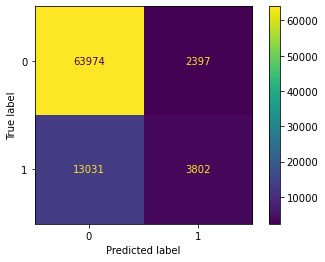

In [29]:
############################################################################
####################### confusion matrix with 5-fold CV#####################
############################################################################

y_pred_336 = cross_val_predict(model_336, X_train, y_train)
confusion_matrix_336 = confusion_matrix(y_train, y_pred_336)
cm_display_336 = ConfusionMatrixDisplay(confusion_matrix_336).plot()

#print(confusion_matrix_315)
scores_336 = cross_val_score(model_336, X_train, y_train, scoring = "accuracy")
print("accuracy for each fold with 336 featurs::", scores_336)
print("%0.6f accuracy with a standard deviation of %0.6f" % (scores_336.mean(), scores_336.std()))



accuracy for each fold with 21 featurs:: [0.81326604 0.81062245 0.80985577 0.81682692 0.80961538]
0.812037 accuracy with a standard deviation of 0.002723


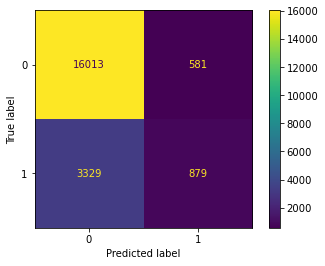

In [30]:
#### confusion matrix with test data, 21 best features #####

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import ConfusionMatrixDisplay

#model_21 = LinearDiscriminantAnalysis(n_components= None)
#model_21.fit(best_features_selected, y_train)
#X_train = model_21.fit_transform(best_features_selected, y_train)
#X_test = model_21.transform(best_features_selected_test)

y_pred_336_test = cross_val_predict(model_336, X_test, y_test, cv =5)
confusion_matrix_336_test = confusion_matrix(y_test, y_pred_336_test)
cm_display_336_test = ConfusionMatrixDisplay(confusion_matrix_336_test).plot()

#print(confusion_matrix_315)

scores_336_test = cross_val_score(model_336, X_test, y_test, scoring = "accuracy")
print("accuracy for each fold with 21 featurs::", scores_336_test)
print("%0.6f accuracy with a standard deviation of %0.6f" % (scores_336_test.mean(), scores_336_test.std()))
#print(best_features_selected_test)
#best_features_selected_test.shape

In [31]:
###################Performance matrics######################
################### LDA###############s model############### 
############5-fold cross validation with 336 features#######
############Confusion Matrix with 336 features##############

from sklearn.metrics import classification_report
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print("confusion matrix::", confusion_matrix(y_train, y_pred_336))

# Accuracy
from sklearn.metrics import accuracy_score
print("accuracy::", accuracy_score(y_train, y_pred_336))

# precision or positive predictive value (PPV)
from sklearn.metrics import precision_score
print("precision::", precision_score(y_train, y_pred_336, average=None))

# Sensitivity/Recall/hit rate/TPR
from sklearn.metrics import recall_score
print("sensitivity/recall::",recall_score(y_train, y_pred_336, average=None))
print("")
print("")
#Classification Rreport
print(classification_report(y_train, y_pred_336))

TN = 66315
TP = 2744
FP = 3057
FN = 13845

#sensitivity, recall, hit rate, or true positive rate (TPR)
sensitivity  = TP / (TP+FN)
print("sensitivity/TPR::", sensitivity)

#specificity, selectivity or true negative rate (TNR)
specificity = TN/(TN+FP)
print("specificity/TNR::", specificity)

#precision or positive predictive value (PPV)
positive_pred_value = TP/ (TP+FP)
print("precison/ PPV::", positive_pred_value)

#negative predictive value (NPV)
negative_pred_value = TN/ (TN+FN)
print("NPV::", negative_pred_value)

confusion matrix:: [[63974  2397]
 [13031  3802]]
accuracy:: 0.814576222297005
precision:: [0.83077722 0.61332473]
sensitivity/recall:: [0.96388483 0.22586586]


              precision    recall  f1-score   support

       False       0.83      0.96      0.89     66371
        True       0.61      0.23      0.33     16833

    accuracy                           0.81     83204
   macro avg       0.72      0.59      0.61     83204
weighted avg       0.79      0.81      0.78     83204

sensitivity/TPR:: 0.16541081439508107
specificity/TNR:: 0.9559332295450614
precison/ PPV:: 0.4730218927771074
NPV:: 0.8272829341317365


In [32]:
###################Performance matrics, test data######################
################### LDA###############s model############### 
############5-fold cross validation with 336 features#######
############Confusion Matrix with 336 features##############

from sklearn.metrics import classification_report
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print("confusion matrix::", confusion_matrix(y_test, y_pred_336_test))

# Accuracy
from sklearn.metrics import accuracy_score
print("accuracy::", accuracy_score(y_test, y_pred_336_test))

# precision or positive predictive value (PPV)
from sklearn.metrics import precision_score
print("precision::", precision_score(y_test, y_pred_336_test, average=None))

# Sensitivity/Recall/hit rate/TPR
from sklearn.metrics import recall_score
print("sensitivity/recall::",recall_score(y_test, y_pred_336_test, average=None))
print("")
print("")
#Classification Rreport
print(classification_report(y_test, y_pred_336_test))

TN = 16729
TP = 948
FP = 536
FN = 3683

#sensitivity, recall, hit rate, or true positive rate (TPR)
sensitivity  = TP / (TP+FN)
print("sensitivity/TPR::", sensitivity)

#specificity, selectivity or true negative rate (TNR)
specificity = TN/(TN+FP)
print("specificity/TNR::", specificity)

#precision or positive predictive value (PPV)
positive_pred_value = TP/ (TP+FP)
print("precison/ PPV::", positive_pred_value)

#negative predictive value (NPV)
negative_pred_value = TN/ (TN+FN)
print("NPV::", negative_pred_value)

confusion matrix:: [[16013   581]
 [ 3329   879]]
accuracy:: 0.8120373041053744
precision:: [0.8278875  0.60205479]
sensitivity/recall:: [0.96498734 0.20888783]


              precision    recall  f1-score   support

       False       0.83      0.96      0.89     16594
        True       0.60      0.21      0.31      4208

    accuracy                           0.81     20802
   macro avg       0.71      0.59      0.60     20802
weighted avg       0.78      0.81      0.77     20802

sensitivity/TPR:: 0.20470740660764414
specificity/TNR:: 0.9689545322907617
precison/ PPV:: 0.6388140161725068
NPV:: 0.8195669214187733


Linear Discriminant Analysis PR AUC: 0.456


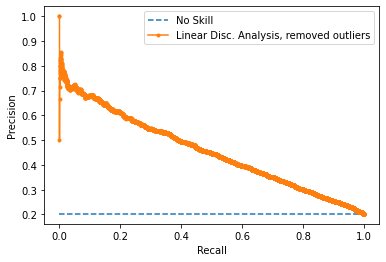

              x         y
0      1.000000  0.202376
1      0.999762  0.202337
2      0.999762  0.202347
3      0.999762  0.202357
4      0.999762  0.202367
5      0.999762  0.202376
6      0.999762  0.202386
7      0.999762  0.202396
8      0.999762  0.202406
9      0.999762  0.202415
10     0.999762  0.202425
11     0.999762  0.202435
12     0.999762  0.202445
13     0.999762  0.202454
14     0.999762  0.202464
15     0.999762  0.202474
16     0.999525  0.202435
17     0.999525  0.202445
18     0.999525  0.202455
19     0.999525  0.202465
20     0.999525  0.202474
21     0.999525  0.202484
22     0.999525  0.202494
23     0.999525  0.202504
24     0.999525  0.202513
25     0.999525  0.202523
26     0.999525  0.202533
27     0.999525  0.202543
28     0.999525  0.202552
29     0.999525  0.202562
30     0.999525  0.202572
31     0.999525  0.202582
32     0.999525  0.202591
33     0.999525  0.202601
34     0.999525  0.202611
35     0.999525  0.202621
36     0.999525  0.202630
37     0.999

In [33]:
#############################################################
###########Precision-recall curve with 336 features--modified##########
#A no-skill classifier is one that cannot discriminate between the classes and would predict a random class
#or a constant class in all cases. The no-skill line changes based on the distribution of the positive to negative classes. 
#It is a horizontal line with the value of the ratio of positive cases in the dataset. For a balanced dataset, this is 0.5.
#############################################################

model_336 = LinearDiscriminantAnalysis(n_components= None)
model_336.fit(X_train, y_train)
X_train = model_336.fit_transform(X_train, y_train)
X_test = model_336.transform(X_test)


#model_336_pr = LinearDiscriminantAnalysis()
#model_336_pr.fit(X_train, y_train)
#y_pred_336_pr = cross_val_predict(model_336_pr, X_train, y_train, cv = 7)

#display = PrecisionRecallDisplay.from_predictions(y_train, y_pred_336_pr, name="LDA, 5-fold CV")
#_ = display.ax_.set_title("Precision-Recall curve # 336 features")


# plot no skill and model precision-recall curves
def plot_pr_curve(y_test, model_probs):
	# calculate the no skill line as the proportion of the positive class
	no_skill = len(y_test[y_test==1]) / len(y_test)
	# plot the no skill precision-recall curve
	pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
	# plot model precision-recall curve
	precision, recall, _ = precision_recall_curve(y_test, model_probs)
	pyplot.plot(recall, precision, marker='.', label='Linear Disc. Analysis, removed outliers')
	# axis labels
	pyplot.xlabel('Recall')
	pyplot.ylabel('Precision')
	# show the legend
	pyplot.legend()
	# show the plot
	pyplot.show()
    

model_336_pr = LinearDiscriminantAnalysis(n_components= None)
model_336_pr.fit(X_train, y_train)
yhat = model_336_pr.predict_proba(X_test)
model_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(y_test, model_probs)
auc_score = auc(recall, precision)
print('Linear Discriminant Analysis PR AUC: %.3f' % auc_score)
# plot precision-recall curves
plot_pr_curve(y_test, model_probs)


df = pd.DataFrame(dict(x = recall,y = precision))
df.to_csv('ldao.csv')

print(df)
fig = px.line(df, x='x', y='y', title='Precision Recall Curve, LDA')
fig.update_layout(hovermode='closest',template='seaborn',width=700,xaxis=dict(mirror=True,linewidth=2,linecolor='black',showgrid=False),
                 yaxis=dict(mirror=True,linewidth=2,linecolor='black'))

In [35]:
stdev_outlier = pd.read_csv("ldao.csv")

import statistics
statistics.stdev(stdev_outlier.y)

0.13360385502586694